# Analysis of Machine Learning Papers on arXiv

In [1]:
import pickle
from dateutil import parser
import matplotlib.pyplot as plt
import matplotlib 
import time
from os import path

import dateutil
from datetime import datetime
from dateutil.relativedelta import relativedelta
from dateutil.rrule import rrule, MONTHLY

from sqlite3 import dbapi2 as sqlite3
from utils import safe_pickle_dump, Config

import matplotlib.pyplot as plt
plt.style.use('ggplot')

%pylab inline
pylab.rcParams['figure.figsize'] = (20, 6)

Populating the interactive namespace from numpy and matplotlib


/Users/Matthew/anaconda/envs/tensorflow/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Load in the dataset

In [2]:
class Document:
    def __init__(self):
        self.date = None
        self.pid = ""
        self.filename = ""
        self.raw_txt = ""
        self.date_code = None

print('loading the paper database', Config.db_path)
db = pickle.load(open(Config.db_path, 'rb'))

def read_file(filename):
    if not path.exists(filename):
        return None
        
    f = open(filename, "r", encoding="utf8")
    return str(f.read())


# create documents
docs = {}
missing = 0
have = 0
for pid,p in db.items():
    document = Document() 
    document.date = dateutil.parser.parse(p['published'])
    document.updated_date = dateutil.parser.parse(p['updated'])
    document.pid = p['id']    
    document.filename = "./data/txt/"+document.pid.split("/")[-1]+".txt"
    document.date_code = document.date.strftime("%Y-%m")    
    document.txt = read_file(document.filename)
    if (document.txt == None):
        missing += 1 
    else:
        have += 1
    docs[pid] = document
    
print("Loaded {0} files, {1} files missing.".format(len(docs), missing))

dates = [doc.date for doc in docs.values()]
first_article_date = min(dates)
last_article_date = max(dates)

print("Articles range from {0} to {1}".format(first_article_date.strftime("%Y-%M"), last_article_date.strftime("%Y-%m")))
    

loading the paper database db.p
Loaded 45788 files, 11845 files missing.
Articles range from 1998-17 to 2017-08


In [10]:
def plot_over_time(label = None, as_percentage = False, _filter = None, start_time = None, smooth = 0.0, marker = 'o'):
    
    if _filter == None and label is not None:        
        _filter = [label]        
    
    keys = []
    dates = []
    x_labels = []
    values = {}
    totals = {}
    
    if start_time is None:
        start_time = parser.parse("2012/01/01")
    end_time = parser.parse("2017/08/30" )
    
    # build a list of months
    for dt in rrule(freq=MONTHLY, dtstart=start_time, until=end_time):
        key = dt.strftime("%Y-%m")
        x_labels.append(key)
        dates.append(dt)
        keys.append(key)
        values[key] = 0
        totals[key] = 0
            
    for doc in docs.values():
        
        key = doc.updated_date.strftime("%Y-%m")
        
        if key not in values:
            continue
        
        totals[key] += 1
                
        if _filter:
            if doc.txt == None:
                totals[key] -= 1
                continue
        
            contains_atleast_one_word = False
            for word in _filter:
                if word.lower() in doc.txt.lower():
                    contains_atleast_one_word = True
                    break
            if not contains_atleast_one_word:
                continue
        
        values[key] += 1
        
    x = keys
    if as_percentage:
        y = [(100 * values[key] / totals[key] if totals[key] >= 10 else 0) for key in keys]
    else:
        y = [values[key] for key in keys]
        
    if smooth != 0.0:
        c = y[0]
        for i in range(len(y)):
            c = c * smooth + (1-smooth) * y[i]
            y[i] = c
    
    plt.grid(True)
    
    x_ticks = range(len(x_labels))
    
    # reduce label spam
    if len(x_ticks) > 100:
        for i in range(len(x_labels)):
            x_labels[i] = x_labels[i] if i % 10 == 0 else "" 
    
    plt.xticks(range(len(x_labels)), x_labels, rotation=90)
    plt.plot(y, label = label, marker = marker)
    
    

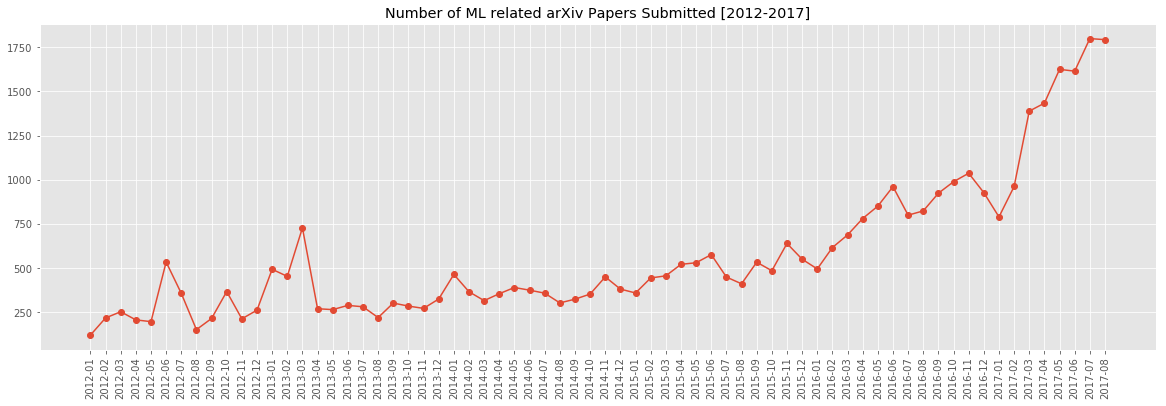

In [4]:
plot_over_time(start_time = parser.parse("2012/01/01"))
plt.title("Number of ML related arXiv Papers Submitted [2012-2017]")
plt.show()

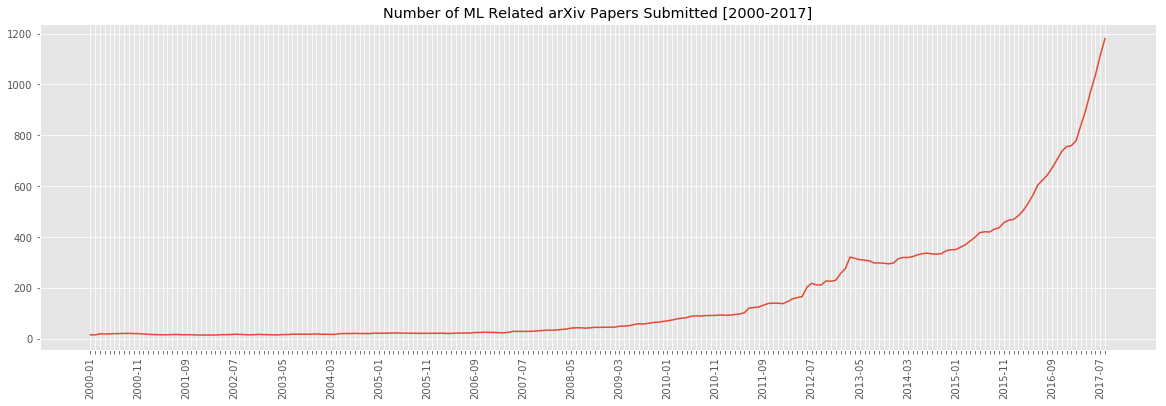

In [17]:
plot_over_time(start_time = parser.parse("2000/01/01"), smooth = 0.9, marker = None)
plt.title("Number of ML Related arXiv Papers Submitted [2000-2017]")
plt.show()

Show articles over time.

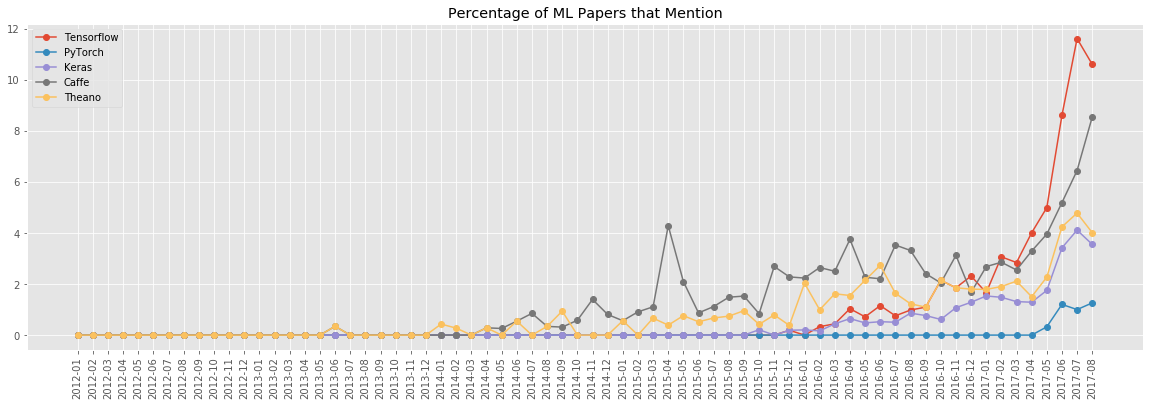

In [13]:
plot_over_time("Tensorflow", as_percentage = True)
plot_over_time("PyTorch", as_percentage = True)
plot_over_time("Keras", as_percentage = True)
plot_over_time("Caffe", as_percentage = True)
plot_over_time("Theano", as_percentage = True)

plt.legend()
plt.title("Percentage of ML Papers that Mention")
plt.show()

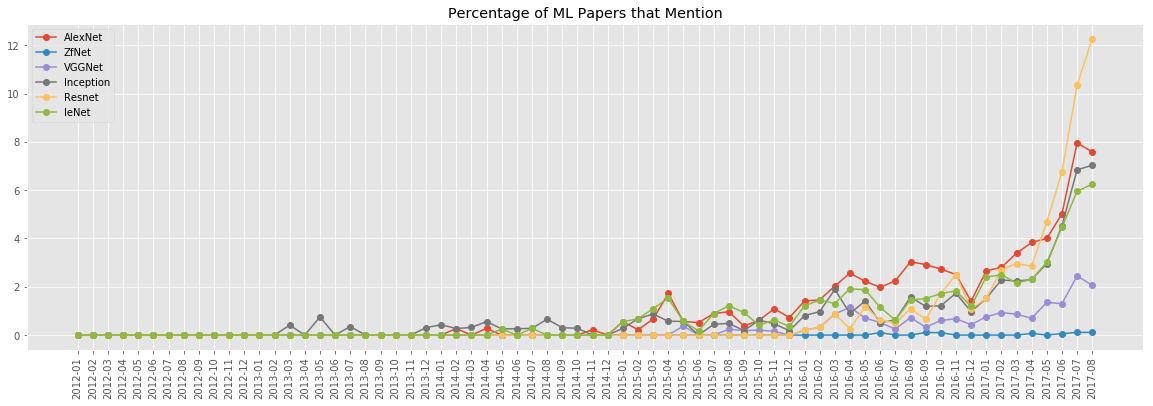

In [6]:
plot_over_time("AlexNet", as_percentage = True)
plot_over_time("ZfNet", as_percentage = True)
plot_over_time("VGGNet", as_percentage = True)
plot_over_time("Inception", as_percentage = True)
plot_over_time("Resnet", as_percentage = True)
plot_over_time("leNet", as_percentage = True)

plt.legend()
plt.title("Percentage of ML Papers that Mention")
plt.show()

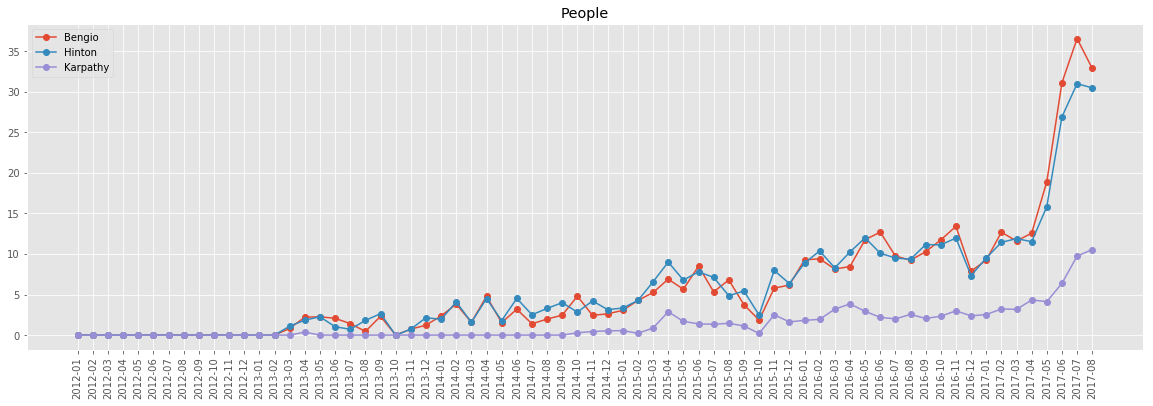

In [7]:
plot_over_time("Bengio", as_percentage = True)
plot_over_time("Hinton", as_percentage = True)
plot_over_time("Karpathy", as_percentage = True)

plt.legend()
plt.title("People")
plt.show()

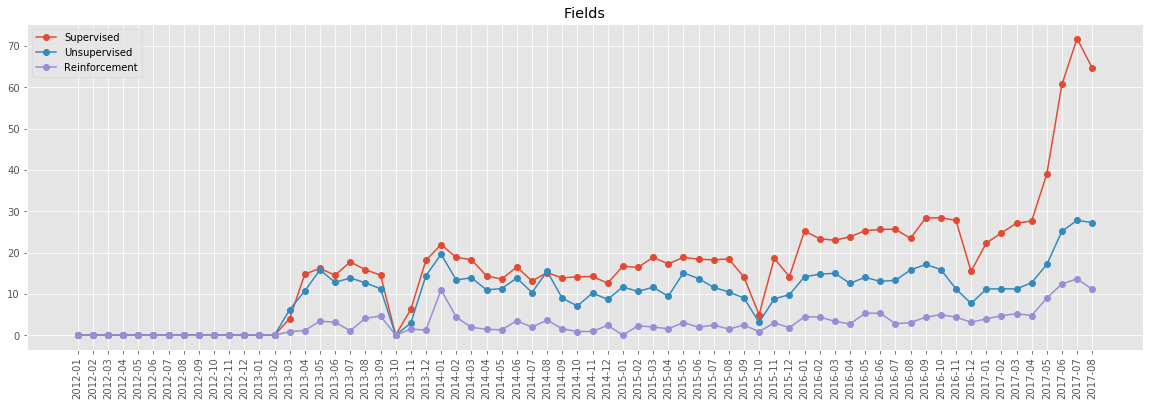

In [8]:
plot_over_time("Supervised", as_percentage = True, _filter = ["svm","knn","neural network"])
plot_over_time("Unsupervised", as_percentage = True, _filter = ["k-means","mixture model","clustering"])
plot_over_time("Reinforcement", as_percentage = True, _filter = ["Q-learning","Temporal difference learning","reinforcement","markov decision process","temporal difference","actor-critic","policy gradient"])

plt.legend()
plt.title("Fields")
plt.show()

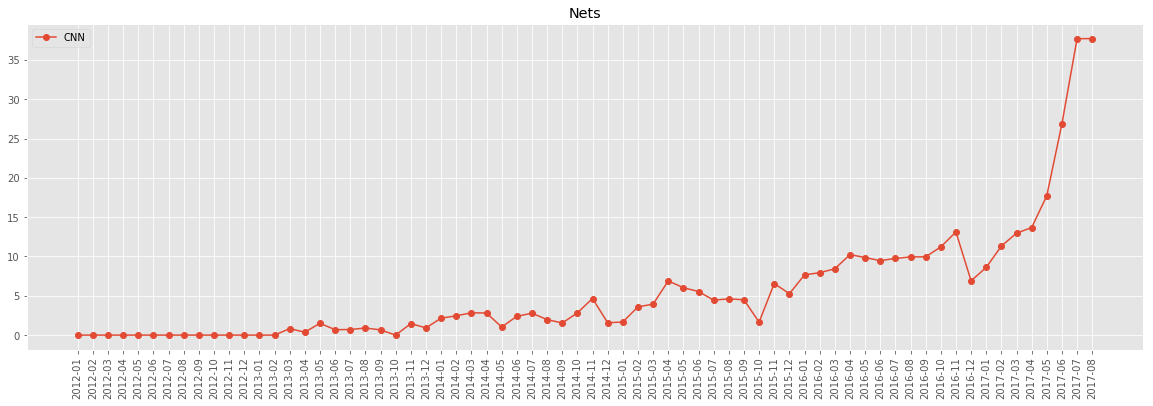

In [9]:
plot_over_time("CNN", as_percentage = True)

plt.legend()
plt.title("Nets")
plt.show()